In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)

df = pd.read_excel('final_dataset_20-21.xlsx')

df.rename(columns=lambda x: x.replace(" (20/21)", ""), inplace=True)

df['Contract Years Left'] = pd.to_numeric(df['Contract Years Left'], errors='coerce')
df['Value'] = df['Value'] / 1000000


In [37]:
df = df[df['MP'] >= 15]

df = df.sort_values(by='Value', ascending=False)


attack_df = df[df['Position'].str.contains("attack")]
midfield_df = df[df['Position'].str.contains("midfield")]
defender_df = df[df['Position'].str.contains("Defender")]

len(attack_df), len(midfield_df), len(defender_df)


(443, 478, 534)

In [38]:
attack_df = attack_df.head(150)
midfield_df = midfield_df.head(150)
defender_df = defender_df.head(150)

In [39]:
attack_df_numeric = attack_df.select_dtypes(include=[np.number])

midfield_df_numeric = midfield_df.select_dtypes(include=[np.number])

defender_df_numeric = defender_df.select_dtypes(include=[np.number])



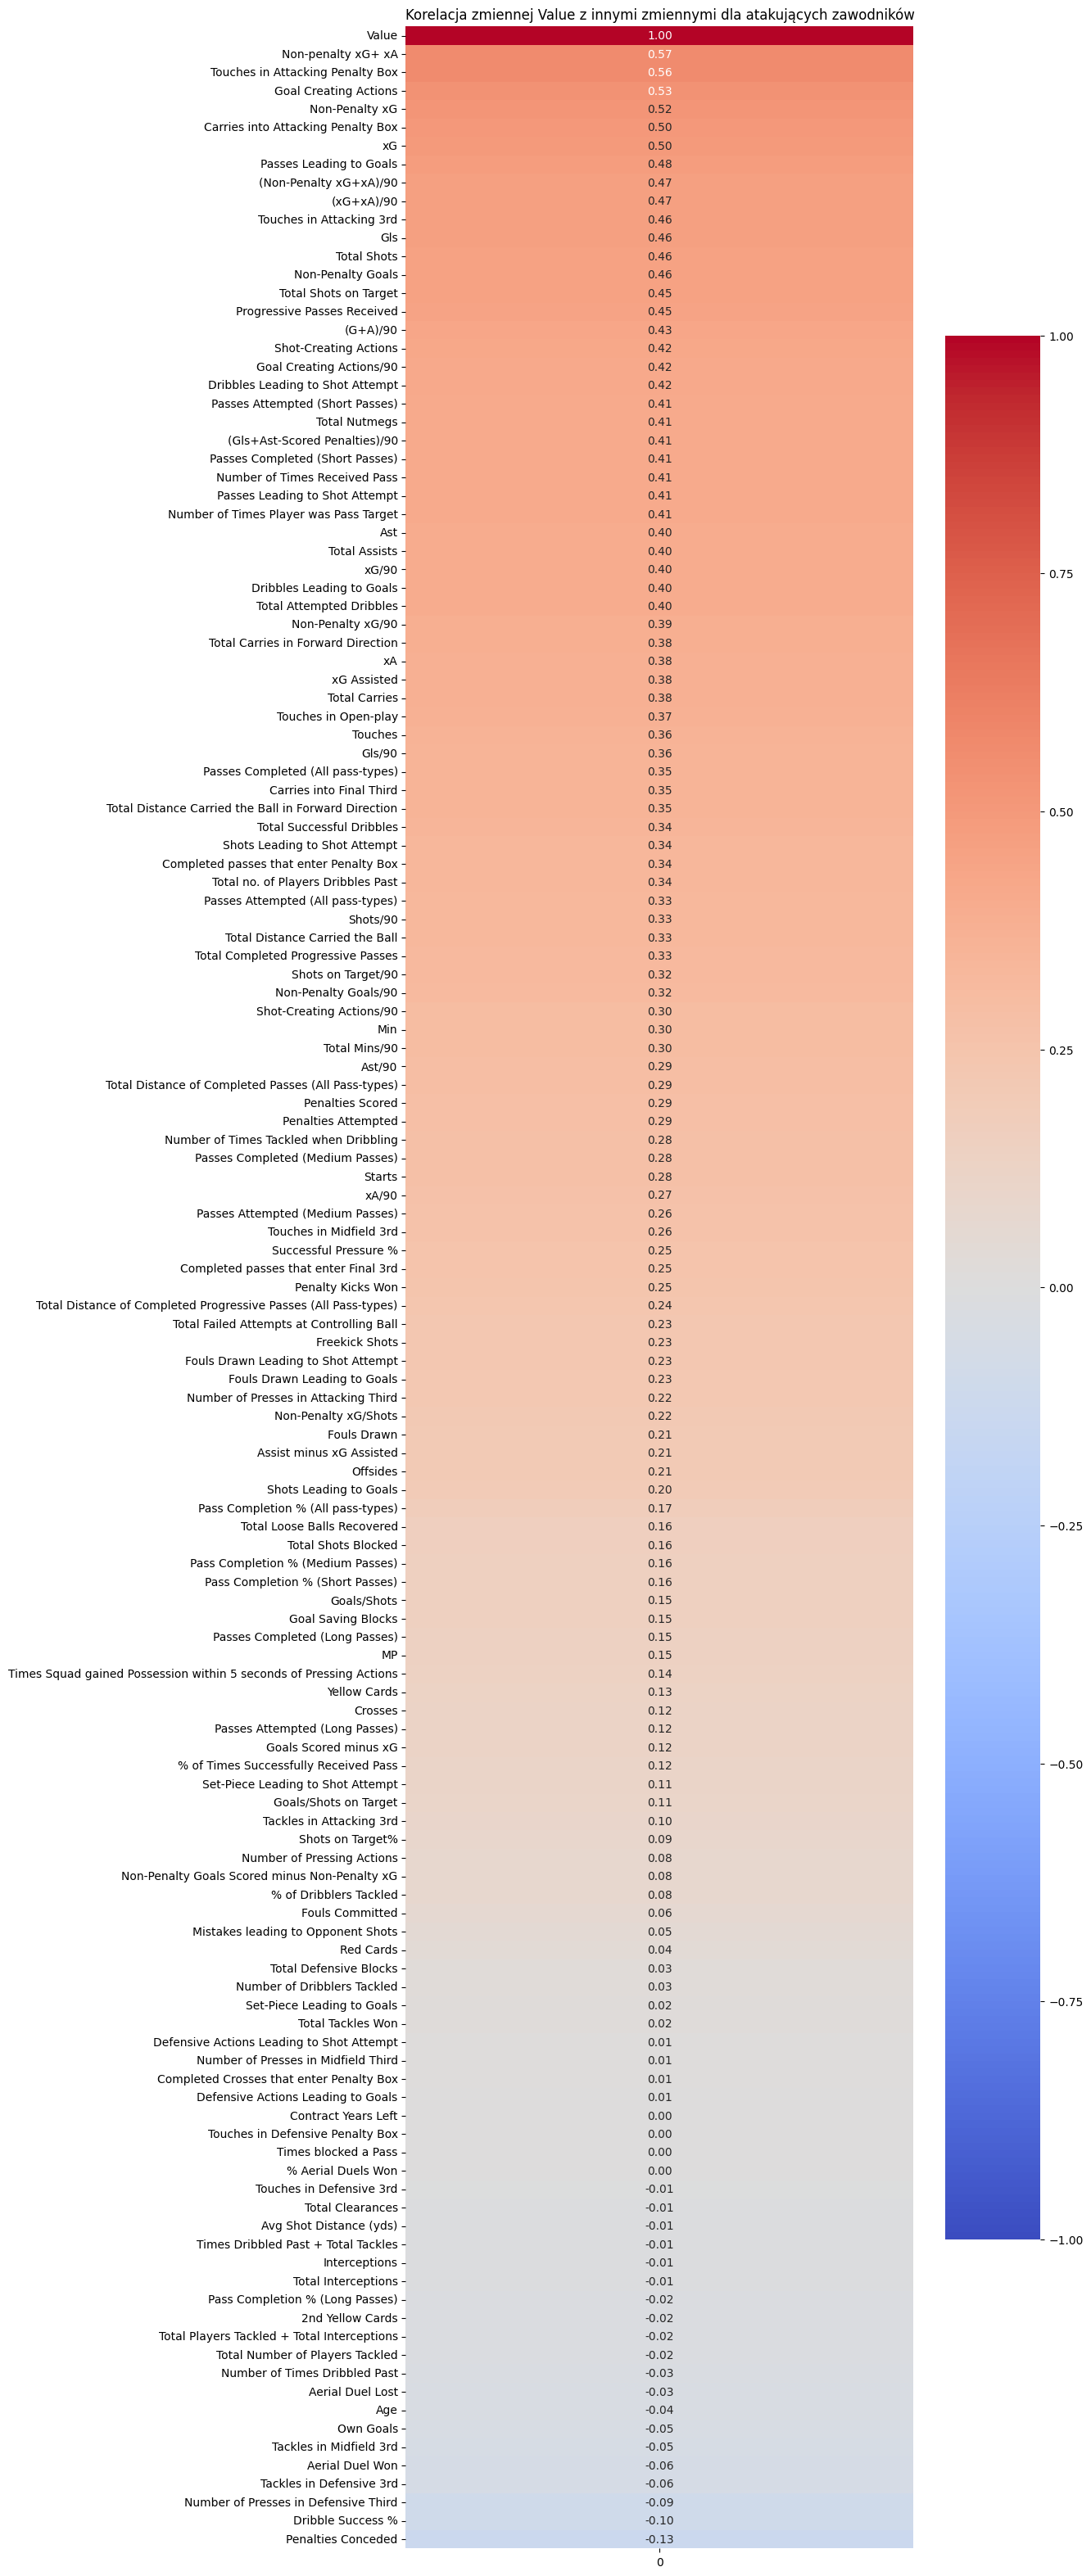

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = attack_df_numeric.corr()['Value'].sort_values(ascending=False)


correlation_matrix_np = correlation_matrix.values.reshape(-1, 1) 


plt.figure(figsize=(10, 40))  
sns.heatmap(correlation_matrix_np, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f",
            yticklabels=correlation_matrix.index) 
plt.title('Korelacja zmiennej Value z innymi zmiennymi dla atakujących zawodników')
plt.show()

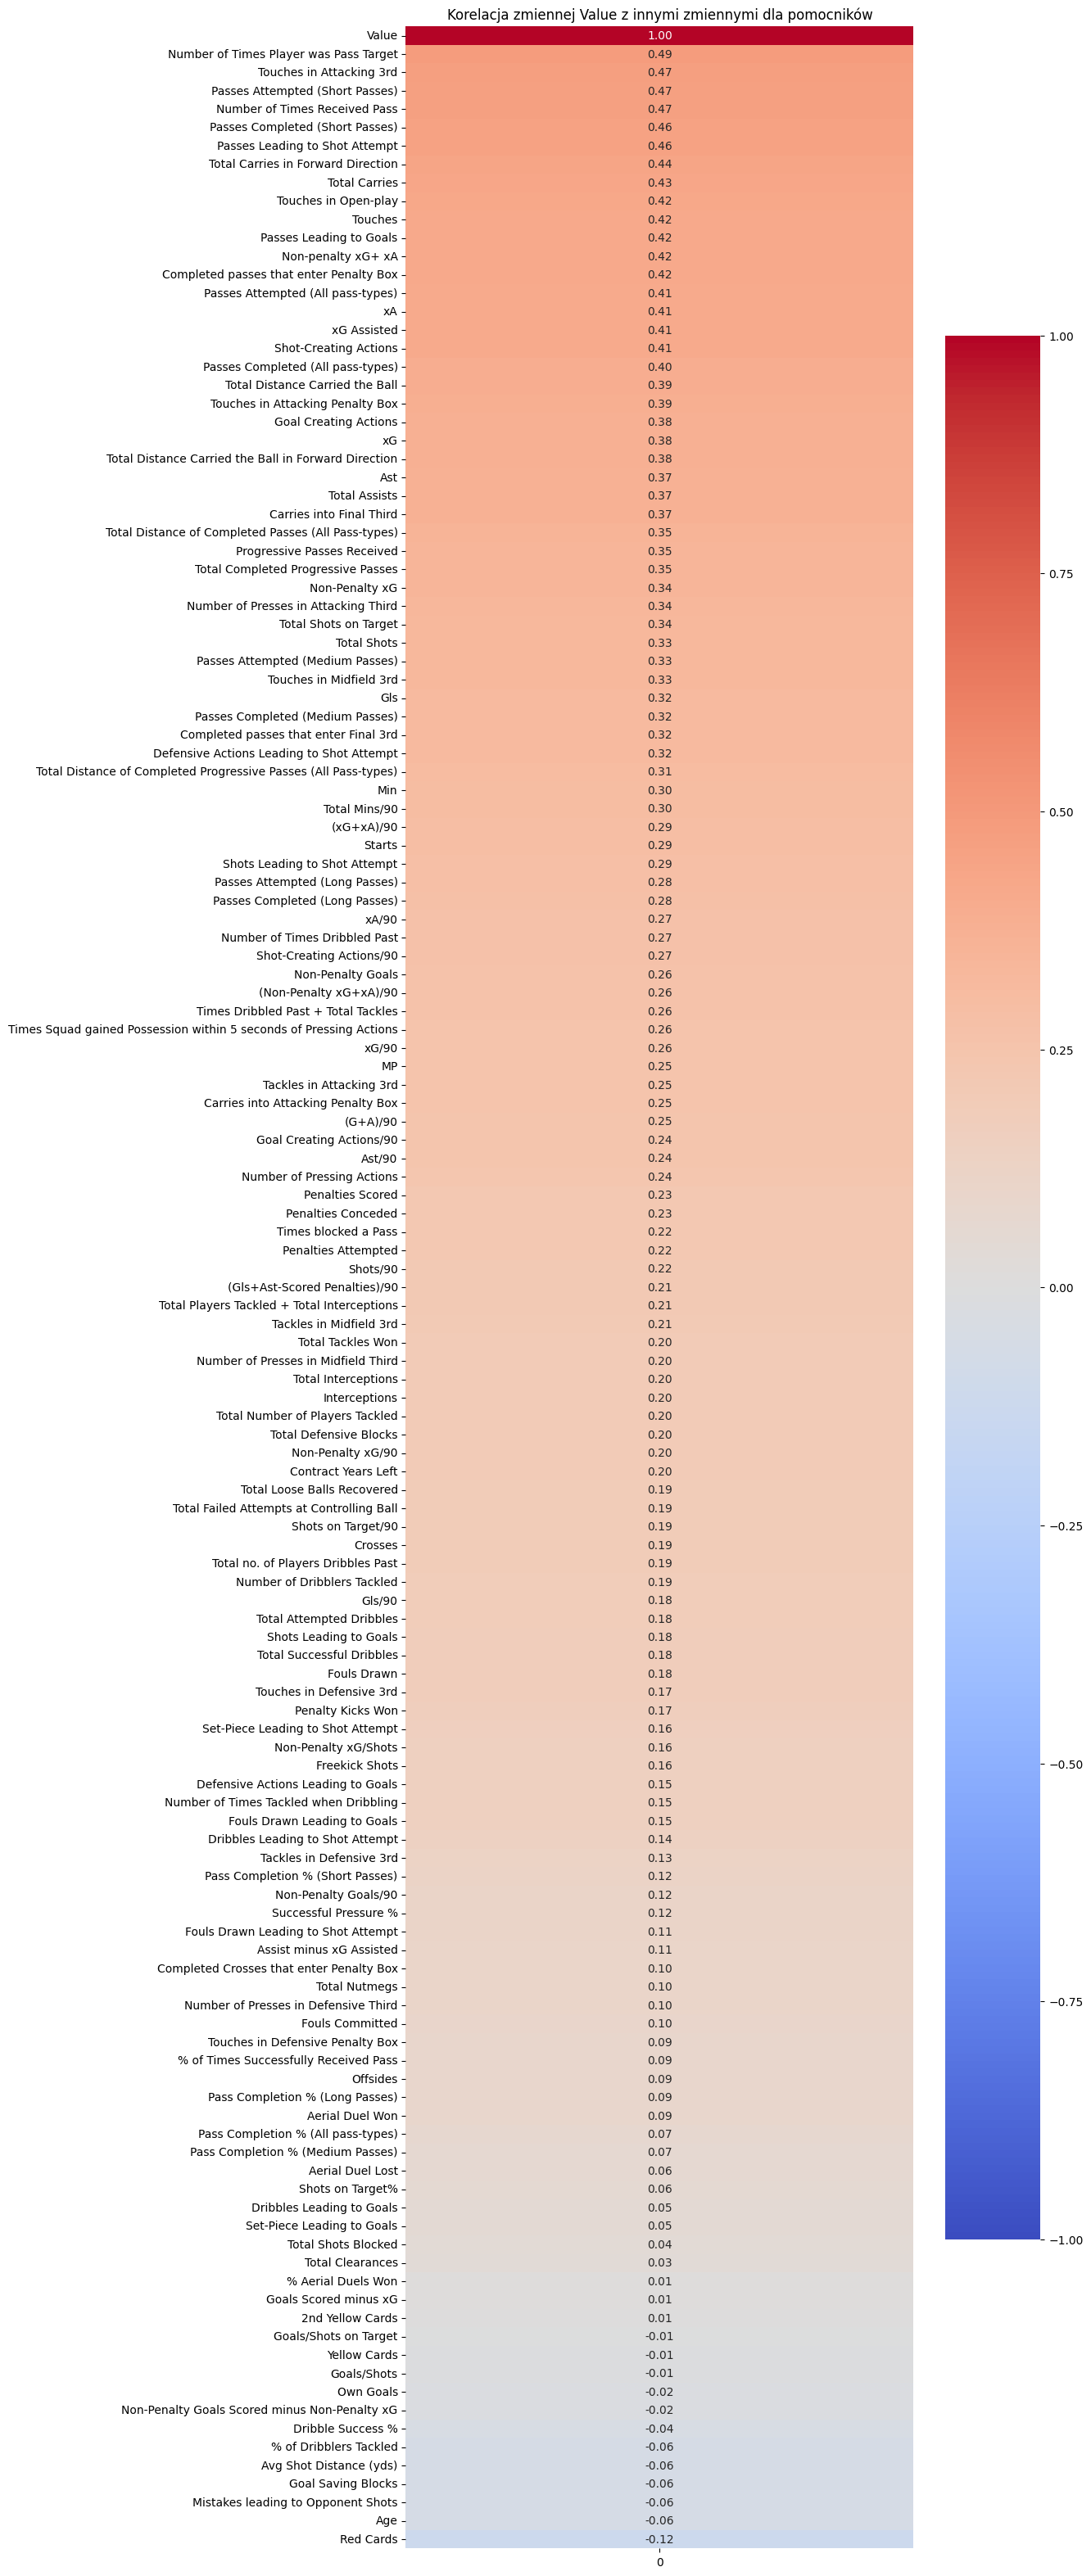

In [41]:
correlation_matrix = midfield_df_numeric.corr()['Value'].sort_values(ascending=False)


correlation_matrix_np = correlation_matrix.values.reshape(-1, 1) 


plt.figure(figsize=(10, 40)) 
sns.heatmap(correlation_matrix_np, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f",
            yticklabels=correlation_matrix.index)  
plt.title('Korelacja zmiennej Value z innymi zmiennymi dla pomocników')
plt.show()

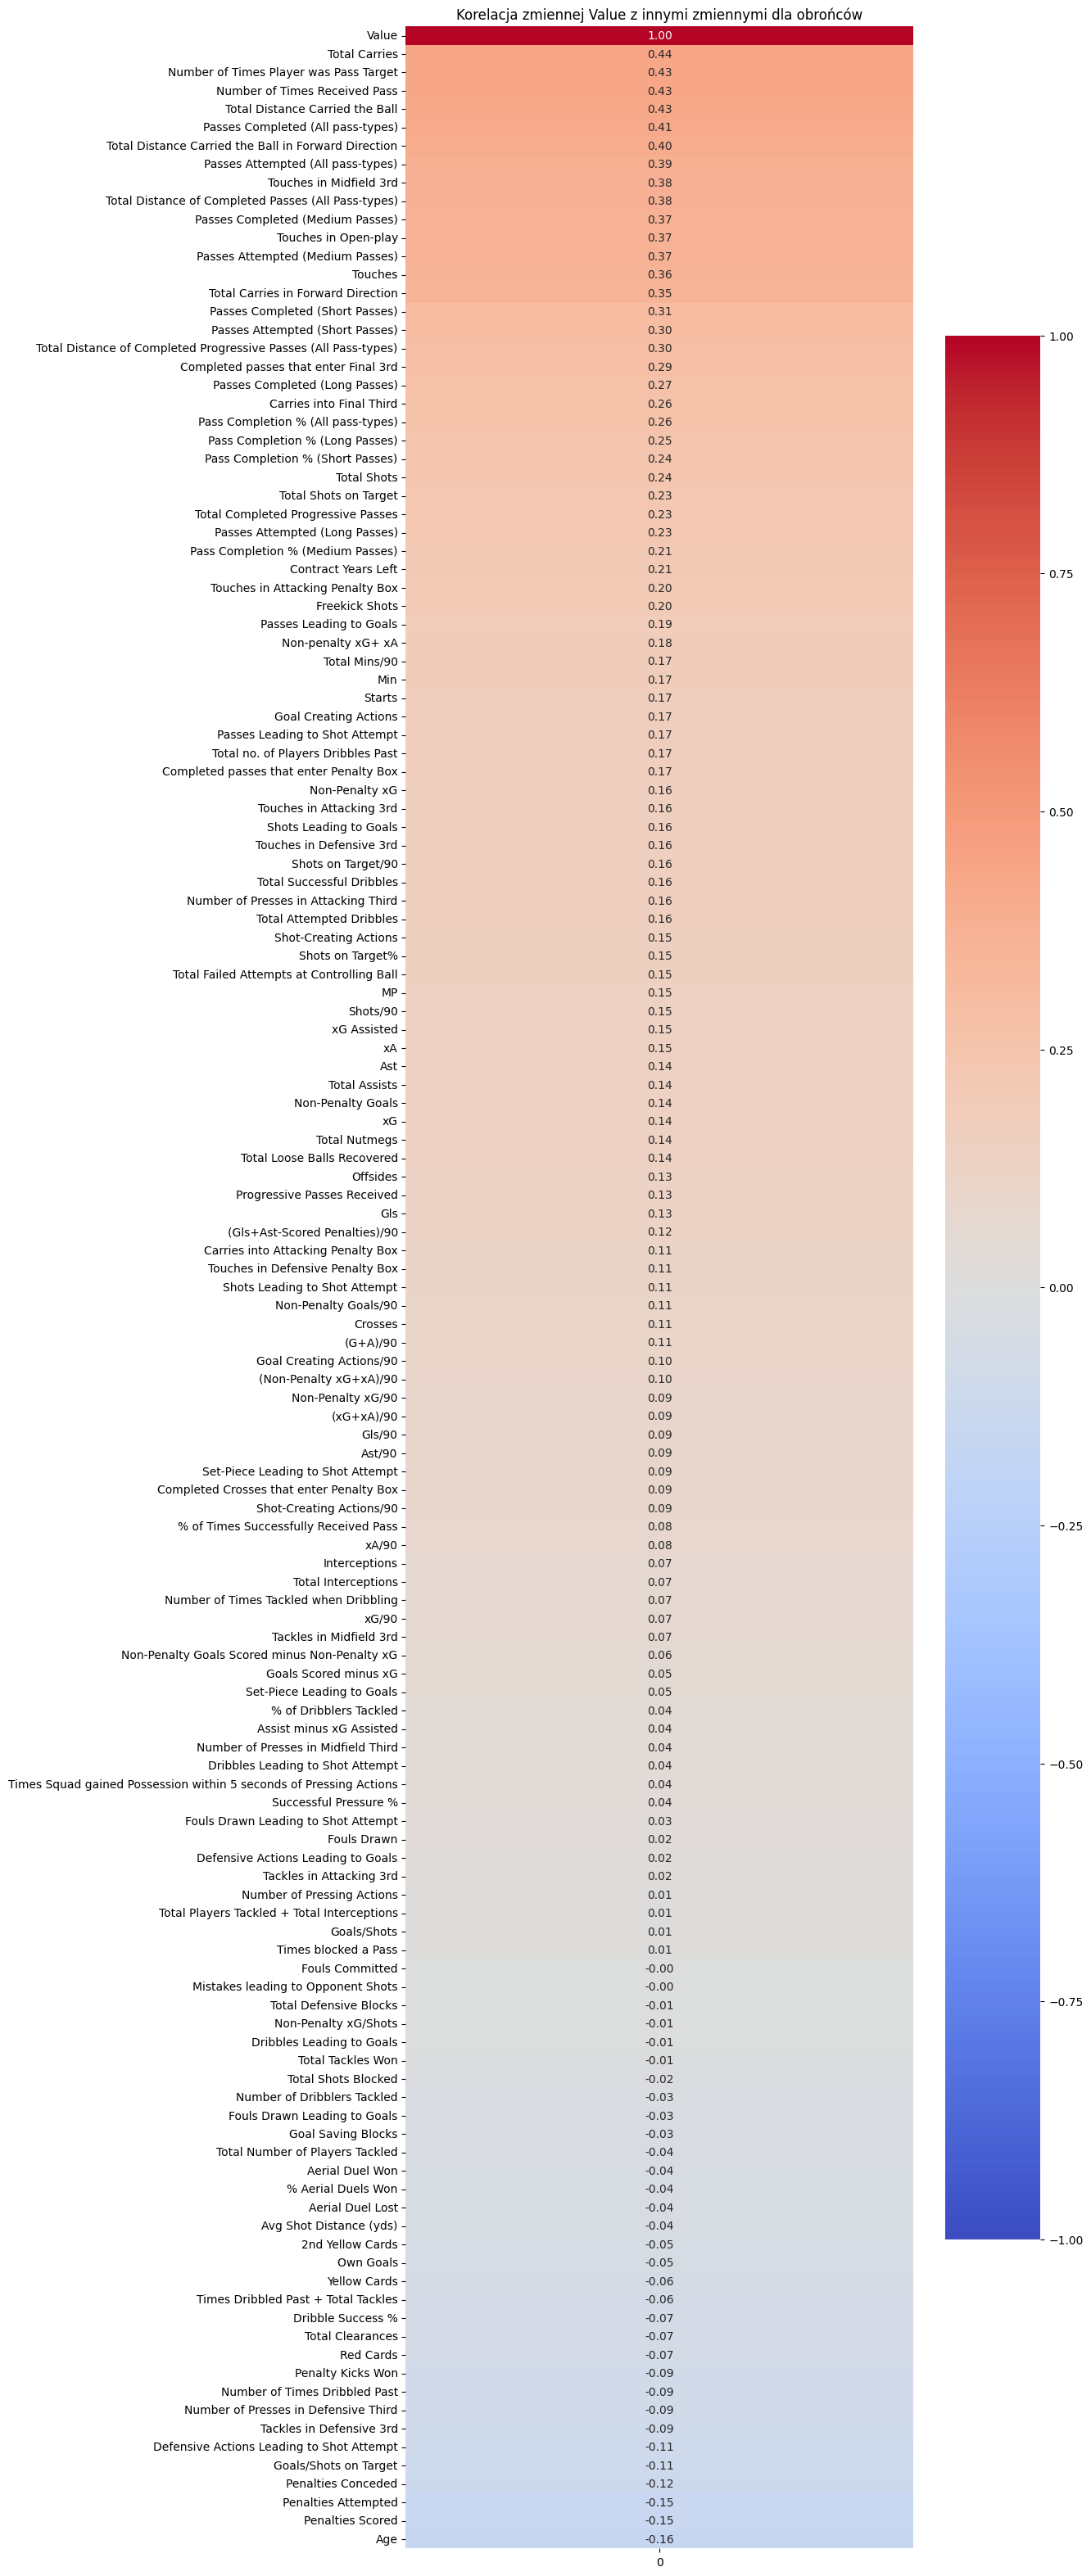

In [42]:
correlation_matrix = defender_df_numeric.corr()['Value'].sort_values(ascending=False)


correlation_matrix_np = correlation_matrix.values.reshape(-1, 1) 

plt.figure(figsize=(10, 40)) 
sns.heatmap(correlation_matrix_np, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f",
            yticklabels=correlation_matrix.index)  
plt.title('Korelacja zmiennej Value z innymi zmiennymi dla obrońców')
plt.show()